# Математическая статистика

In [1]:
from statistics import multimode

import numpy as np
import scipy.stats as sps
import ipywidgets as widgets
import matplotlib.pyplot as plt
import PyPDF2
import re

%matplotlib inline

In [2]:
N = 14
print(f'Номер в группе {N}')

Номер в группе 14


**Задача.** Получение и визуализация выборки заданного <i><u>дискретного</u></i> распределения 

<i>Шаг 1.</i> 

Из списка дискретных случайных величин выберите случайные величины с номером $N$. 

In [3]:
variants = np.array([
    1, 4, 6, 7, 12, 27, 28, 29.5, 30, 31.9, 32, 
    39, 39.1, 39.2, 39.3, 39.4, 40, 41, 42, 50
])
freq = np.array([2, 3, 4, 5, 6, 7, 7, 5, 6, 7, 8, 10, 25, 1, 1, 1, 1, 1, 4, 1]) / 105

Визуализируем входные данные для наглядности распределения:

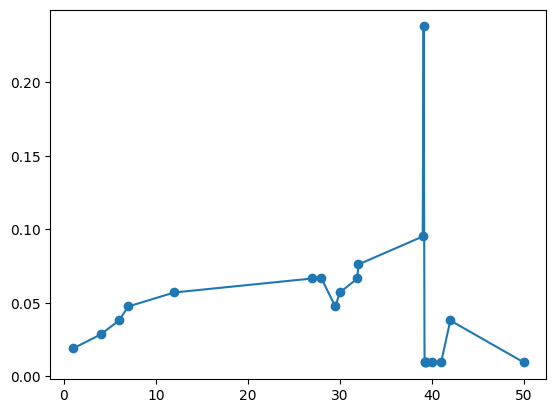

Случайная величина: Вероятностная мера


{1.0: 0.01904761904761905,
 4.0: 0.02857142857142857,
 6.0: 0.0380952380952381,
 7.0: 0.047619047619047616,
 12.0: 0.05714285714285714,
 27.0: 0.06666666666666667,
 28.0: 0.06666666666666667,
 29.5: 0.047619047619047616,
 30.0: 0.05714285714285714,
 31.9: 0.06666666666666667,
 32.0: 0.0761904761904762,
 39.0: 0.09523809523809523,
 39.1: 0.23809523809523808,
 39.2: 0.009523809523809525,
 39.3: 0.009523809523809525,
 39.4: 0.009523809523809525,
 40.0: 0.009523809523809525,
 41.0: 0.009523809523809525,
 42.0: 0.0380952380952381,
 50.0: 0.009523809523809525}

In [4]:
table = dict(zip(variants, freq))
plt.plot(variants, freq, '-o')
plt.show()

print('Случайная величина: Вероятностная мера')
table

<i>Шаг 2.</i>

Для данных случайных величин, создайте функцию распределения вашей случайной величины (если необходимо).

In [5]:
summary = sum(freq)

print(f'Сумма частот -{summary}, что не равно 1 из-за дискретности ЭВМ, поэтому выполняем нормализацию.')

freq_norm = list(map(lambda p: p / summary, freq))

print(f'Снова суммируем и получаем: {sum(freq_norm)}')

distribution = sps.rv_discrete(values = (variants, freq_norm))

Сумма частот -0.9999999999999997, что не равно 1 из-за дискретности ЭВМ, поэтому выполняем нормализацию.
Снова суммируем и получаем: 1.0


<i>Шаг 3.</i>

Создайте выборку длины 100 для вашей случайной величины. Напечатайте массив частот и массив вариант

In [6]:
size = 100
sample = distribution.rvs(size = size)

In [7]:
sample

array([28. ,  1. , 28. , 28. , 42. , 27. , 30. , 39.1,  7. , 41. , 28. ,
       28. , 39.1, 31.9, 39.4,  4. ,  6. , 50. ,  4. ,  6. , 39.1, 41. ,
        1. , 39.1, 12. , 32. , 39.2, 39.1, 27. , 39. , 28. , 27. , 32. ,
        7. , 39. , 12. , 39. , 42. , 39.1, 39.1,  4. , 39.1, 42. , 39.1,
       39. , 27. ,  7. , 39.1, 27. ,  6. , 28. , 12. , 39.1, 39.2, 29.5,
       39.1, 42. ,  1. , 39. , 39.1, 39.1, 12. , 39.2, 30. , 39.1, 31.9,
       27. , 30. , 28. , 29.5,  1. ,  7. , 39. , 39.2, 28. , 30. , 12. ,
       41. , 42. , 41. , 32. , 28. , 39.1, 39. , 39. ,  6. , 39.1, 39.1,
       39. ,  1. , 39.1, 39. , 27. ,  4. , 42. , 28. , 27. , 39.2, 39. ,
       30. ])

In [8]:
variants

array([ 1. ,  4. ,  6. ,  7. , 12. , 27. , 28. , 29.5, 30. , 31.9, 32. ,
       39. , 39.1, 39.2, 39.3, 39.4, 40. , 41. , 42. , 50. ])

<i>Шаг 4.</i>

Опишите вашу выборку: объем, экстремальные статистики, медиана, мода, размах, среднее, дисперсия, эксцесс и асимметрия. Сравните с результатами калькуляции функциями из пакета Stats https://docs.scipy.org/doc/scipy/reference/stats.html

In [9]:
from collections import Counter
from collections import OrderedDict

counter = Counter(sample)
oredered = OrderedDict(sorted(counter.items(), key = lambda t: t[0]))

variants = oredered.keys()
freq = oredered.values()

In [10]:
def find_median(array):
    middle = len(array) / 2.
    if (middle % 1 == 0):
        return (array[int(middle) + 1] + array[int(middle)]) / 2
    else:
        return array[int(middle)]

In [11]:
print('Объем выборки:', len(sample))
print('Минимум, максимум:', (min(sample), max(sample)))

avg = sum(sample) / size

def moment(n, length = size, array = sample):
    return np.sum(list(map(lambda x: (x - avg) ** n, array))) / length

print('Среднее:', avg)
print('Дисперсия:', moment(2, length = size - 1))
print('Размах:', max(sample) - min(sample))

print('Ассиметрия:', moment(3) / moment(2) ** (3 / 2))
print('Эксцесс:', moment(4) / (moment(2) ** 2) - 3)

print('II момент:', moment(2))
print('III момент:', moment(3))
print('IV момент:', moment(4))

print('Медиана:', find_median(list(sample)))
print('Мода:', multimode(list(sample)))

Объем выборки: 100
Минимум, максимум: (1.0, 50.0)
Среднее: 28.990999999999985
Дисперсия: 178.85719090909086
Размах: 49.0
Ассиметрия: -0.9387366822430403
Эксцесс: -0.4724646801131924
II момент: 177.06861899999996
III момент: -2211.8526365579924
IV момент: 79246.56261672839
Медиана: 20.0
Мода: [39.1]


Получаем значения через функции из пакета Stats

In [12]:
obj = sps.describe(sample)

print('Объем выборки:', obj.nobs)
print('Минимум, максимум:', obj.minmax)
print('Среднее:', obj.mean)
print('Дисперсия:', obj.variance)

print('Ассиметрия:', obj.skewness)
print('Эксцесс:', obj.kurtosis)

print('II момент:', sps.moment(sample, moment = 2))
print('III момент:', sps.moment(sample, moment = 3))
print('IV момент:', sps.moment(sample, moment = 4))

mode = sps.mode(sample, keepdims = False)

print(f'Мода: {mode.mode} количество: {mode.count}')

Объем выборки: 100
Минимум, максимум: (1.0, 50.0)
Среднее: 28.991
Дисперсия: 178.8571909090909
Ассиметрия: -0.9387366822430435
Эксцесс: -0.472464680113188
II момент: 177.06861899999996
III момент: -2211.852636558
IV момент: 79246.56261672852
Мода: 39.1 количество: 19


Как мы видим, все характеристики совпадают

<i>Шаг 5.</i>

Создайте полигон частот и гистограмму для каждой выборки


Список количества каждой случайной величины в выборке

In [13]:
counter

Counter({39.1: 19,
         28.0: 11,
         39.0: 11,
         27.0: 8,
         42.0: 6,
         1.0: 5,
         30.0: 5,
         12.0: 5,
         39.2: 5,
         7.0: 4,
         41.0: 4,
         4.0: 4,
         6.0: 4,
         32.0: 3,
         31.9: 2,
         29.5: 2,
         39.4: 1,
         50.0: 1})

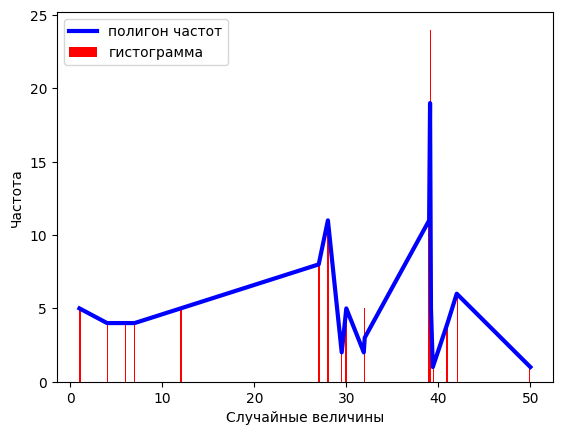

In [14]:
plt.figure()
plt.plot(variants, freq, color = 'blue', lw = 3, label = 'полигон частот')
plt.hist(sample, 3 * size, color = 'red', label = 'гистограмма')
plt.legend()

plt.xlabel('Случайные величины')
plt.ylabel('Частота')

plt.show()

**Задача.** Получение и визуализация выборки заданного <i><u>непрерывного</u></i> распределения.

<i>Шаг 1.</i> 

Из списка непрерывных случйных величин выберите с номером $N$. 

In [15]:
reader = PyPDF2.PdfReader('datasets/Непрерывные величны, практикум 1.pdf')

message = 'Вариант '
variant = f'Вариант {N}'

for i in range(len(reader.pages)):
    
    text = reader.pages[i].extract_text()
    
    if variant in text:
        index = text.index(str(N))
        
        end = index
        while not end == len(text) and not text[end] == 'Вариант':
            message += text[end]
            end += 1
        break

print(message)

Вариант 14
X распределен по закону N(2, 5)



In [16]:
parameters = re.findall(r'\w+', message)

μ = int(parameters[-2])
σ_square = int(parameters[-1])

print(f'μ = {μ}, σ_square = {σ_square}')

μ = 2, σ_square = 5


<i>Шаг 2.</i>

Для данных случайных величин, создайте функцию распределения вашей случайной величины (если необходимо).

In [17]:
normal = sps.norm.rvs(size = size, loc = μ, scale = np.sqrt(σ_square))
show_count = 12

print(f'Первые {show_count} значений выборки:\n', normal[:show_count])

Первые 12 значений выборки:
 [-0.65550977  3.41287918  1.8107897  -2.01200263  5.02921281  3.32386626
  2.74280717  5.24159076 -0.45387743  0.09774318  5.036375    2.37909349]


<i>Шаг 3.</i>

Создайте выборку длины 100 для вашей случайной величины. Напечатайте массив частот и массив вариант

In [18]:
counter = Counter(normal)
oredered = OrderedDict(sorted(counter.items(), key = lambda t: t[0]))

variants = oredered.keys()
freq = oredered.values()

print(f'Массив вариант: \n{variants}', '\n\n' , f'Массив частот: \n{freq}')

Массив вариант: 
odict_keys([-2.6196990664042685, -2.012002634161539, -1.6550979207475587, -1.5399463239308462, -1.2867797379449586, -1.190532453071011, -1.0392944881651207, -0.6555097699675687, -0.4538774330052924, -0.322488754134751, -0.10925197465989456, 0.09774317738672322, 0.13486943059947842, 0.3309425304962532, 0.33851494884062383, 0.7382376729391302, 0.8551786109519581, 0.8611919896152396, 0.8694458467338322, 0.9650641158386131, 0.99950915042807, 1.0515849914124091, 1.0606308108936031, 1.0672738594565336, 1.0870532110936162, 1.2195095570711594, 1.3494147809620909, 1.4295595899679878, 1.430131333411536, 1.493656875877052, 1.546570353371191, 1.6052610395339748, 1.6304463928809807, 1.642330961345102, 1.6502419052045143, 1.6603906073781303, 1.7073622748230588, 1.7434615084156984, 1.8107897017750672, 1.8623966385108994, 1.8660444698233527, 1.8751825406729457, 1.8905814454073635, 1.9241983645633376, 1.9763088289422528, 1.9915994564595416, 2.114748682922163, 2.2043514233226467, 2.2407

<i>Шаг 4.</i>

Опишите вашу выборку: объем, экстремальные статистики, медиана, мода, размах, среднее, дисперсия, эксцесс и асимметрия. Сравните с результатами калькуляции функциями из пакета Stats https://docs.scipy.org/doc/scipy/reference/stats.html

In [19]:
print('Объем выборки:', len(normal))
print('Минимум, максимум:', (min(normal), max(normal)))

avg = sum(normal) / size

print('Среднее:', avg)
print('Дисперсия:', moment(2, length = size - 1, array = normal))
print('Размах:', max(normal) - min(normal))

print('Ассиметрия:', moment(3, array = normal) / moment(2, array = normal) ** (3 / 2))
print('Эксцесс:', moment(4, array = normal) / (moment(2, array = normal) ** 2) - 3)

print('II момент:', moment(2, array = normal))
print('III момент:', moment(3, array = normal))
print('IV момент:', moment(4, array = normal))

print('Медиана:', find_median(list(normal)))
print('Мода (ограничение на 3 значения):', multimode(list(normal))[:3])

Объем выборки: 100
Минимум, максимум: (-2.6196990664042685, 9.645140639171519)
Среднее: 2.4764283482786564
Дисперсия: 4.9486723449139705
Размах: 12.264839705575788
Ассиметрия: 0.5085420340657816
Эксцесс: 0.7613953822213921
II момент: 4.899185621464831
III момент: 5.5145832507913735
IV момент: 90.28108626505633
Медиана: 0.2663449284086036
Мода (ограничение на 3 значения): [-0.6555097699675687, 3.4128791810510535, 1.8107897017750672]


Получаем значения через функции из пакета Stats

In [20]:
obj = sps.describe(normal)

print('Объем выборки:', obj.nobs)
print('Минимум, максимум:', obj.minmax)
print('Среднее:', obj.mean)
print('Дисперсия:', obj.variance)

print('Ассиметрия:', obj.skewness)
print('Эксцесс:', obj.kurtosis)

print('II момент:', sps.moment(normal, moment = 2))
print('III момент:', sps.moment(normal, moment = 3))
print('IV момент:', sps.moment(normal, moment = 4))

mode = sps.mode(normal, keepdims = False)

print(f'Мода: {mode.mode} количество: {mode.count}')

Объем выборки: 100
Минимум, максимум: (-2.6196990664042685, 9.645140639171519)
Среднее: 2.476428348278657
Дисперсия: 4.9486723449139705
Ассиметрия: 0.5085420340657812
Эксцесс: 0.7613953822213895
II момент: 4.899185621464831
III момент: 5.514583250791369
IV момент: 90.28108626505627
Мода: -2.6196990664042685 количество: 1


Как мы видим, все характеристики совпадают

<i>Шаг 5.</i>

Создайте полигон частот и гистограмму для каждой выборки


Список количества каждой случайной величины в выборке

In [21]:
counter

Counter({-0.6555097699675687: 1,
         3.4128791810510535: 1,
         1.8107897017750672: 1,
         -2.012002634161539: 1,
         5.029212814358774: 1,
         3.3238662560198287: 1,
         2.742807170851089: 1,
         5.241590760296791: 1,
         -0.4538774330052924: 1,
         0.09774317738672322: 1,
         5.036375002876767: 1,
         2.3790934900706238: 1,
         -1.190532453071011: 1,
         2.386135960460875: 1,
         7.196057289673476: 1,
         4.02828297456692: 1,
         2.5139195473865246: 1,
         7.8108511596422625: 1,
         2.2407946068446507: 1,
         -1.2867797379449586: 1,
         -1.0392944881651207: 1,
         5.126665434930196: 1,
         1.6052610395339748: 1,
         2.5099077074918537: 1,
         0.3309425304962532: 1,
         1.6304463928809807: 1,
         3.264396696789127: 1,
         2.4334883701499104: 1,
         0.8611919896152396: 1,
         2.2043514233226467: 1,
         2.3988234764375895: 1,
         3.43

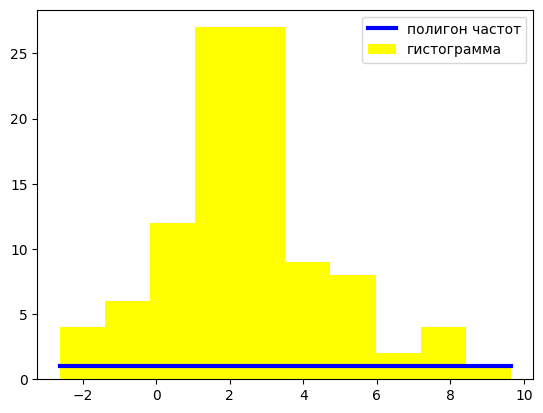

In [22]:
plt.figure()
plt.plot(variants, freq, color = 'blue', lw = 3, label = 'полигон частот')
plt.hist(normal, 10, color = 'yellow', label = 'гистограмма')
plt.legend()
plt.show()